In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom,poisson,norm

<function matplotlib.pyplot.show(close=None, block=None)>

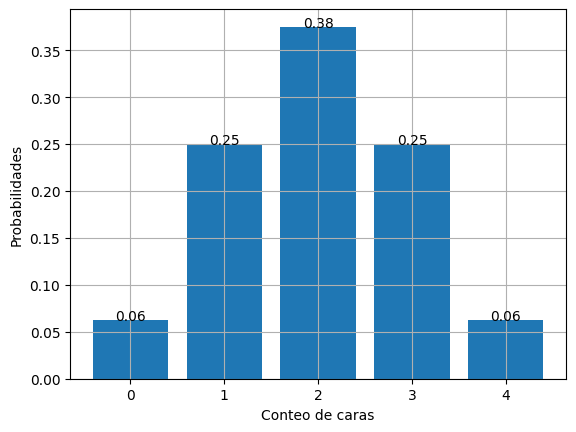

In [4]:
#En un lanzamiento de 4 monedas cual es la probabilidad de obtener 2 caras P(X=2),
# y cual es la probabilidad de obtener 3 o menos caras? P(X<=3) hint = esto es sumar la P(x=0)+P(x=1)+P(x=2)
#espacio_muestra = 0,1,2,3,4
n = 4
p = 0.5
results = [0,1,2,3,4] #list(range(n+1))
freqs = [binom.pmf(i,n,p) for i in results]
plt.bar(results,freqs)
for i, val in enumerate(freqs): #enumerate nos devuelve como primer termino el indice de la colección y como segun termino el valor
    plt.text(i, val, round(val,2), ha = "center") #los argumentos de text son las coordenadas x,y, y el valor a escribir
plt.grid(True)
plt.xlabel("Conteo de caras")
plt.ylabel("Probabilidades")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

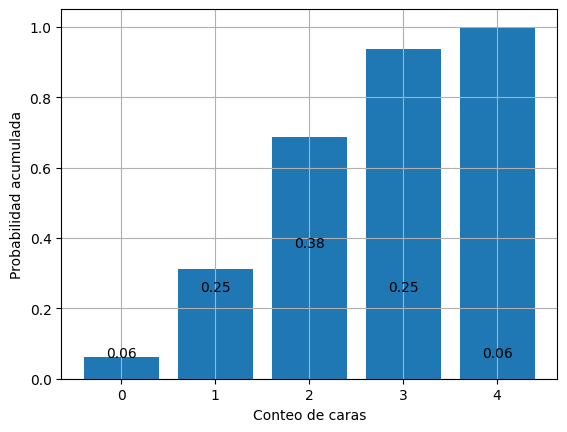

In [5]:
accum_freqs = [sum(freqs[:i+1]) for i in range(len(freqs))]
plt.bar(results, accum_freqs)
for i, val in enumerate(freqs): #enumerate nos devuelve como primer termino el indice de la colección y como segun termino el valor
    plt.text(i, val, round(val,2), ha = "center") #los argumentos de text son las coordenadas x,y, y el valor a escribir
plt.grid(True)
plt.xlabel("Conteo de caras")
plt.ylabel("Probabilidad acumulada")
plt.show

In [6]:
binom.pmf(1,4,0.5) #3 argumentos, el primero es el numero de exitos, el segundo es la cantidad de eventos, y el último es la probabilidad

np.float64(0.25)

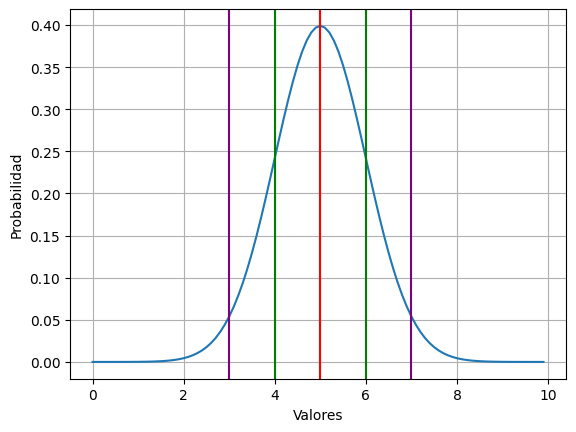

In [7]:
start = 0
end = 10
num = 100
numbers = [start+i*(end-start)/num for i in range(num)]
freqs = [norm.pdf(value,5,1) for value in numbers ] # los argumentos de norm.pdf son numero de sucesos, media, y desviacion estandar
plt.plot(numbers, freqs)
plt.grid(True)
plt.axvline(5, color= "red")
plt.axvline(4, color= "green")
plt.axvline(6, color= "green")
plt.axvline(3, color= "purple")
plt.axvline(7, color= "purple")
plt.xlabel("Valores")
plt.ylabel("Probabilidad")
plt.show()

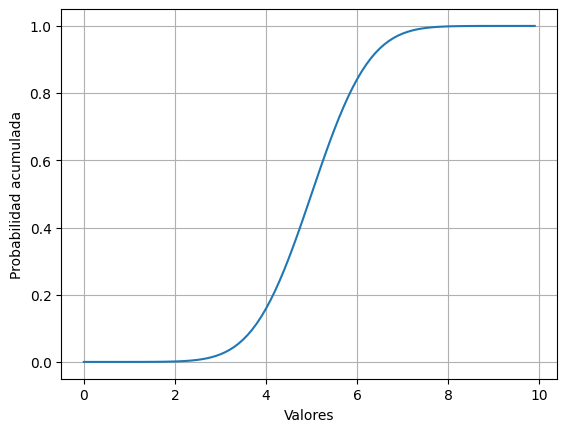

In [13]:
accum_freqs = [norm.cdf(value,5,1) for value in numbers ] 
plt.plot(numbers, accum_freqs)
plt.grid(True)
plt.xlabel("Valores")
plt.ylabel("Probabilidad acumulada")
plt.show()

In [8]:
#una maquina produce sacos de centeno que pesan 3 kilos con una desviación estandar de 0.5 kilos. Un operario opina que la maquina no esta bien calibrada
#Toma una muestra de sacos al azar e indica [2.3, 2.9, 3.1, 2.5, 2.8, 3.0, 2.7] e indica que la maquina definitivamente no esta haciendo sacos de 3 kilos
#Podemos darle la razon al operario?
#definimos la hipotesis 
#H0: mu = 3 kilos
#H1: mu != 3 kilos
#nivel de significancia: alfa - 0.5
#los parametros dados son poblacionales, es decir, que
sacks = np.array([2.3, 2.9, 3.1, 2.5, 2.8, 3.0, 2.7])
population_mean = 3
population_std = 0.5 #desviación estandar
sample_mean = sacks.mean()
sample_std = sacks.std()
print(f"media: {sample_mean:.2f} y desviación: {sample_std:.2f}")


media: 2.76 y desviación: 0.26


In [10]:
z_score = (sample_mean-population_mean)/(population_std/np.sqrt(len(sacks))) #en el numerado la diferencia de la media poblacional y muestral
#denominador es la desviación estandar de la población entre la raiz cuadrada de la cantidad de muestras (error estandar)
p_value = 2*(1-norm.cdf(abs(z_score)))
print(f"z_score es: {z_score:.2f} y el p_value es: {p_value:.2f}")
#si el p_value es mayor que el nivel de significancia se rechaza la h ipotesis alterna,
#si el p_value es menor que el nivel de significancia no se tienen argumentos para rechazar la hipotesis alterna
# entonces no le damos la razon al operario

z_score es: -1.29 y el p_value es: 0.20
